In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

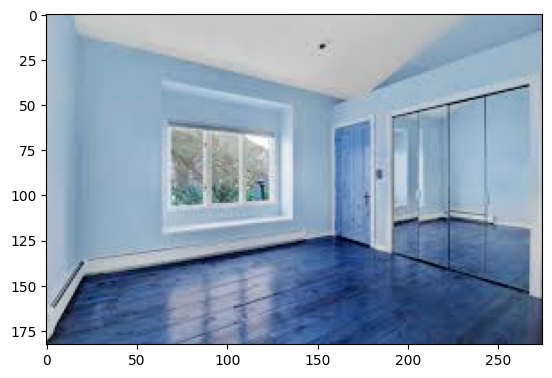

In [4]:
img = cv2.imread('./images/unfurbished.jpeg')
plt.imshow(img) # shows in BGR, convert to RGB

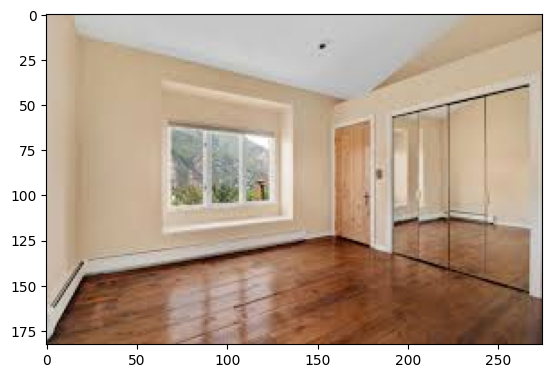

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
img2 = img.reshape((img.shape[1] * img.shape[0], 3))

In [7]:
kmeans = KMeans(n_clusters = 5) # arbitrary number of clusters
s = kmeans.fit(img2)

In [8]:
labels = kmeans.labels_
print(labels)
labels = list(labels)

[3 3 3 ... 4 4 4]


In [9]:
centroid = kmeans.cluster_centers_
print(centroid)

[[158.83956594 125.48647746 100.60901503]
 [191.89041355 170.57319958 145.86675499]
 [125.51827554  80.28317044  52.73142322]
 [203.72044415 196.0984832  187.21111837]
 [ 80.25140809  44.38044035  25.61136713]]


In [10]:
percent = []
for i in range(len(centroid)):
    j = labels.count(i)
    j /= len(labels)
    percent.append(j)
print(percent)

[0.119324391455539, 0.41951316443119724, 0.14829607550919027, 0.27380029806259315, 0.039066070541480376]


In [11]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
hex_colors = [rgb_to_hex(color) for color in centroid]

([<matplotlib.patches.Wedge at 0x74f7d0b10ce0>,
 [Text(1.0236112916631523, 0.4027653455545709, '#9e7d64'),
  Text(-0.5243541079575804, 0.9669812663480147, '#bfaa91'),
  Text(-0.8342629312193263, -0.716941672378819, '#7d5034'),
  Text(0.49343026385732747, -0.9831208342364068, '#cbc4bb'),
  Text(1.091725987914758, -0.13466390500630107, '#502c19')])

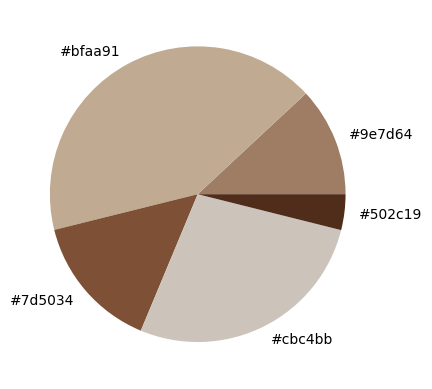

In [12]:
hex_colors = [rgb_to_hex(color) for color in centroid]
plt.pie(percent, colors=np.array(centroid/255), labels=hex_colors)

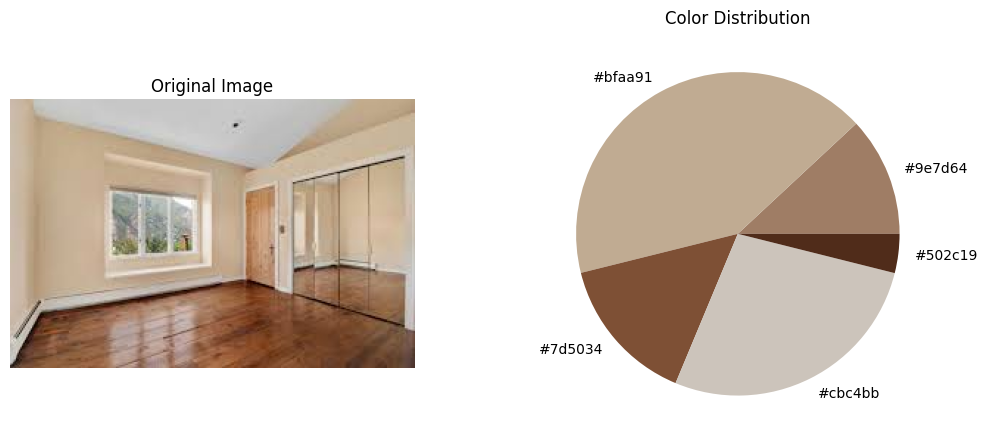

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))  # Adjust figure size

# Left Subplot: Display the original image using imshow
ax[0].imshow(img)
ax[0].axis('off')  # Hide the axes for the image
ax[0].set_title("Original Image")

# Right Subplot: Display the pie chart
ax[1].pie(percent, colors=np.array(centroid / 255), labels=hex_colors, wedgeprops=dict(width=1))
ax[1].set_title("Color Distribution")

# Adjust the layout
plt.subplots_adjust(wspace=0.3)  # Add space between subplots
plt.show()
